In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"./heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
import pandas as pd
#numerial columns 
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# fuction for boxplot
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

# each columns 
outlier_counts = {}
for col in numeric_cols:
    outlier_counts[col] = count_outliers_iqr(df, col)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
print(outlier_df)



        Column  Outlier Count
0          Age              0
1    RestingBP             28
2  Cholesterol            183
3        MaxHR              2
4      Oldpeak             16


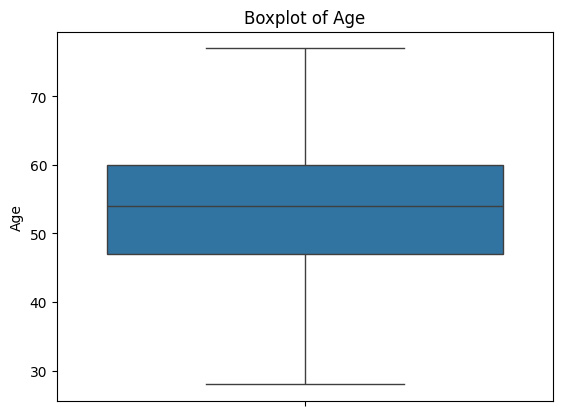

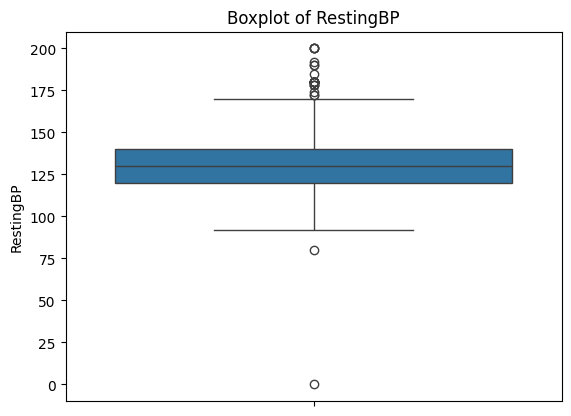

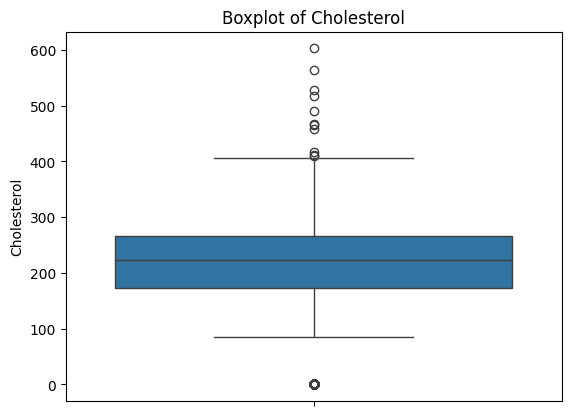

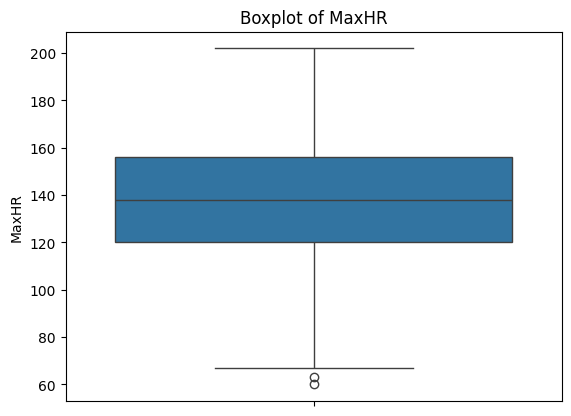

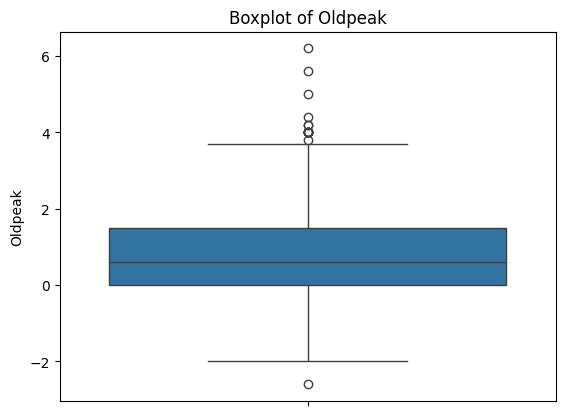

In [7]:
#outliers 
for col in numeric_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")


In [8]:
import numpy as np

In [9]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # نعمل Capping
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

print("done")


done


In [10]:
outlier_counts_after = {}
for col in numeric_cols:
    outlier_counts_after[col] = count_outliers_iqr(df, col)

pd.DataFrame(list(outlier_counts_after.items()), columns=['Column', 'Outlier Count After'])


,Column,Outlier Count After
0,Age,0
1,RestingBP,0
2,Cholesterol,0
3,MaxHR,0
4,Oldpeak,0


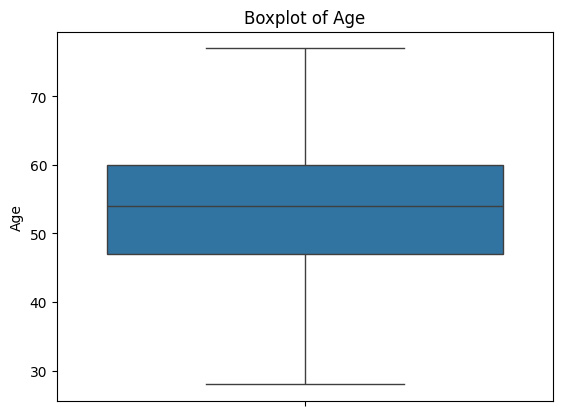

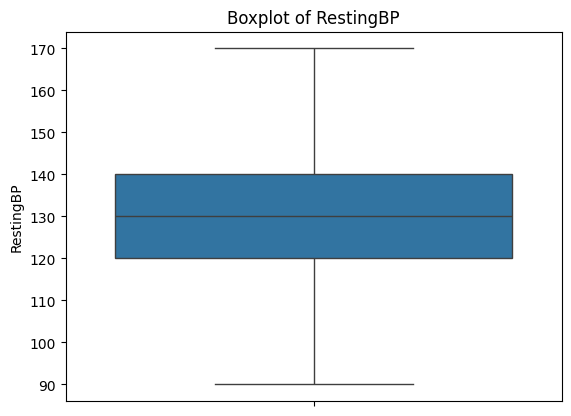

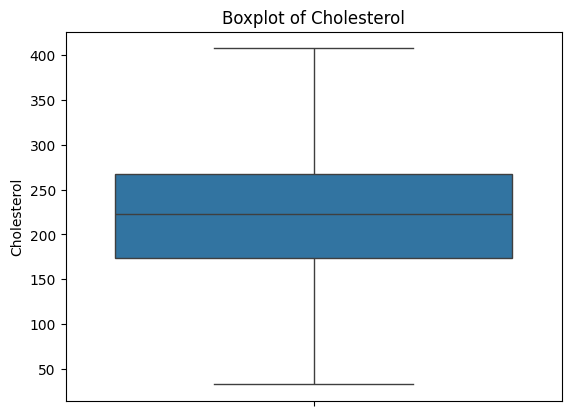

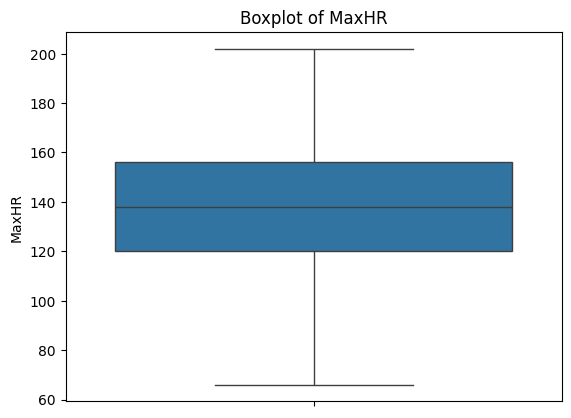

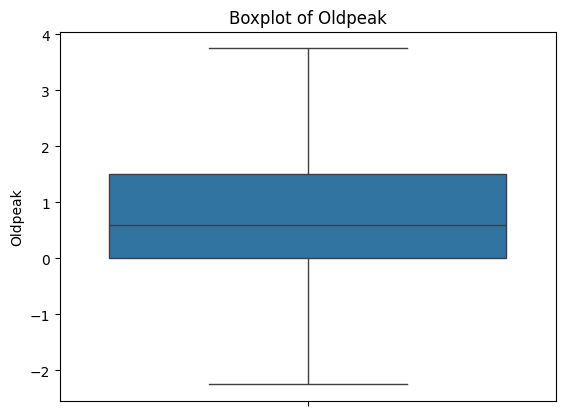

In [11]:
#outliers 
for col in numeric_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")


In [12]:

df_encoded = df.copy()

# Label Encoding
label_cols = ['Sex', 'ExerciseAngina', 'FastingBS']
le = LabelEncoder()

for col in label_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    else:
        print(f" Column '{col}' not found in dataframe!")

# One-Hot Encoding
one_hot_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

#bool
df_encoded = df_encoded.astype(int)


print(" Encoding done successfully!")

 Encoding done successfully!


In [13]:
print(df_encoded.head()) # اسم الداتا الجديد هو  df_encoded


   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0        0             0                  1                  0   
1        1             1                  0                  1   
2        0             0                  1                  0   
3        1             1                  0                  0   
4        0             0                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0                 0                  1              0              0   
1                 0 

In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int64
 1   Sex                918 non-null    int64
 2   RestingBP          918 non-null    int64
 3   Cholesterol        918 non-null    int64
 4   FastingBS          918 non-null    int64
 5   MaxHR              918 non-null    int64
 6   ExerciseAngina     918 non-null    int64
 7   Oldpeak            918 non-null    int64
 8   HeartDisease       918 non-null    int64
 9   ChestPainType_ATA  918 non-null    int64
 10  ChestPainType_NAP  918 non-null    int64
 11  ChestPainType_TA   918 non-null    int64
 12  RestingECG_Normal  918 non-null    int64
 13  RestingECG_ST      918 non-null    int64
 14  ST_Slope_Flat      918 non-null    int64
 15  ST_Slope_Up        918 non-null    int64
dtypes: int64(16)
memory usage: 114.9 KB


In [15]:
df_scaled = df_encoded.copy() #اسم الداتا الجديد 

scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])


In [16]:
df_scaled[numeric_cols].describe() #القيم محصورة بين 0و1 


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.083616e-16,-3.560454e-16,9.288140e-17,-2.322035e-16,-1.548023e-17
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-2.480283e+00,-1.789029e+00,-2.786160e+00,-2.913542e+00
25%,-6.906294e-01,-7.139209e-01,-3.186489e-01,-6.616980e-01,-7.557111e-01
50%,5.188098e-02,-1.251334e-01,1.992371e-01,4.645600e-02,-7.557111e-01
75%,6.883185e-01,4.636541e-01,6.572669e-01,7.546100e-01,3.232046e-01
max,2.491558e+00,2.230017e+00,2.114635e+00,2.564337e+00,2.481036e+00


In [17]:
df_scaled['HeartDisease'].value_counts()


HeartDisease
1    508
0    410
Name: count, dtype: int64

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [19]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          58
Cholesterol       212
FastingBS           2
RestingECG          3
MaxHR             118
ExerciseAngina      2
Oldpeak            47
ST_Slope            3
HeartDisease        2
dtype: int64

In [35]:
cols = df.columns[df.nunique() < 10].unique()
for c in cols:
    print(df[c].dtypes, c, df[c].unique())

object Sex ['M' 'F']
object ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
int64 FastingBS [0 1]
object RestingECG ['Normal' 'ST' 'LVH']
object ExerciseAngina ['N' 'Y']
object ST_Slope ['Up' 'Flat' 'Down']
int64 HeartDisease [0 1]


In [36]:
cols = df.select_dtypes(exclude='number').columns
df[cols] = df[cols].astype('category')

In [37]:
df.to_csv('heart_dashboard.csv', index=False)

In [38]:
df = pd.get_dummies(columns=df.select_dtypes('category').columns, data=df, drop_first=True)

In [39]:
df.to_csv('heart_model.csv', index=False)